# [0] Скрипт переноса всех файлов в корневой каталог

In [24]:
import os
import shutil

def resolve_path(filename, destination_dir):
    dest = os.path.join(destination_dir, filename)
    *base_parts, extension = filename.split('.')
    base_name = '.'.join(base_parts)
    duplicate_num = 1
    while os.path.exists(dest):
        new_base = base_name + str(duplicate_num).zfill(5)
        new_filename = "{}.{}".format(new_base, extension)
        dest = os.path.join(destination_dir, new_filename)
        duplicate_num += 1
    return dest

In [29]:
import os
import shutil
doc_path = 'D:\\dataset3'

for root, dirs, files in os.walk(doc_path, topdown=False):
    for file in files:
        try:
            source_path = os.path.join(root, file)
            destination_path = resolve_path(file, doc_path)
            shutil.move(source_path, destination_path)
        except OSError:
            pass

# [1] Чтение результатов теста SpeedTest

In [1]:
import pandas
import matplotlib.pyplot as plt


csv_file = 'C:\Dev\GitRepos\skywalker\speed_test.csv'
columns = [
    'number', 
    'sample_data',
    'name', 
    'extension', 
    'original_size_in_kb', 

    'lz4_size_in_kb', 
    'lz4_compression_ratio',
    'lz4_compression_time',
    'lz4_decompression_time',
    'lz4_total_time',
    'lz4_result',

    'snappy_size_in_kb',
    'snappy_compression_ratio',
    'snappy_compression_time',
    'snappy_decompression_time',
    'snappy_total_time',
    'snappy_result',

    'bzip2_size_in_kb',
    'bzip2_compression_ratio',
    'bzip2_compression_time',
    'bzip2_decompression_time',
    'bzip2_total_time',
    'bzip2_result',
    
    'best_result',
    'best_compressor',
    'best_compressor_id'
]


pandas.set_option('display.max_columns', 26)
pandas.set_option('display.max_rows', 20)

table = pandas.read_csv(csv_file, names=columns, sep =',')

print(table)

      number                                        sample_data  \
0          1  PCFkb2N0eXBlIGh0bWw+PGh0bWwgbGFuZz0icnUiIGRpcj...   
1          2  PCFkb2N0eXBlIGh0bWw+PGh0bWwgbGFuZz0icnUiIGRpcj...   
2          3  PCFkb2N0eXBlIGh0bWw+PGh0bWwgbGFuZz0icnUiIGRpcj...   
3          4  PCFET0NUWVBFIGh0bWw+CjxodG1sIGxhbmc9InJ1IiBpZD...   
4          5  PCFET0NUWVBFIGh0bWw+CjxodG1sIGxhbmc9InJ1IiBpZD...   
5          6  PCFET0NUWVBFIGh0bWw+PGh0bWwgbGFuZz1lbj48bWV0YS...   
6          7  PCFET0NUWVBFIGh0bWw+PGh0bWwgbGFuZz1lbj48bWV0YS...   
7          8  PCFkb2N0eXBlIGh0bWw+PGh0bWwgbGFuZz0icnUiIGRpcj...   
8          9  PCFET0NUWVBFIGh0bWw+PGh0bWwgbGFuZz1lbj48bWV0YS...   
9         10  PCFET0NUWVBFIGh0bWw+PGh0bWwgbGFuZz1lbj48bWV0YS...   
...      ...                                                ...   
8990    8991  UklGRph1AgBXQVZFZm10ICgAAAD+/wEAgLsAAIAyAgADAB...   
8991    8992  H4sIAAAAAAAAA+29y3IbWbouNq+nyMOK3bs6WgkgrwBUIj...   
8992    8993  H4sIAAAAAAAAA+192XLbSJfmfT0FmhVd/f9hgyQAgovLUv..

### Поколоночное чтение

In [2]:
num_col = table.number.tolist()
sample_data_col = table.sample_data.tolist()

lz4_col = table.lz4_result.tolist()
snappy_col = table.snappy_result.tolist()
bzip2_col = table.bzip2_result.tolist()

result_col = table.best_compressor_id.tolist()

### Вывод статистики

In [3]:
import numpy as np

unique, counts = np.unique(result_col, return_counts=True)
dict(zip(unique, counts))

{0: 4316, 1: 51, 2: 1696, 3: 2937}

# [1.1] Просмотр результата SpeedTest 

In [22]:
from __future__ import print_function

print("=========================================")
print("sample:")
print(*sample_data_col, sep='\n')
print("=========================================")

print("=========================================")      
print("lz4 result:")
print(*lz4_col, sep='\n')
print("=========================================")

print("=========================================")      
print("snappy result:")
print(*snappy_col, sep='\n')
print("=========================================")

print("=========================================")
print("bzip2 result:")
print(*bzip2_col, sep='\n')
print("=========================================")

print("=========================================")
print("Best result:")
print(*result_col, sep='\n')
print("=========================================")

sample:
PCFkb2N0eXBlIGh0bWw+PGh0bWwgbGFuZz0icnUiIGRpcj0ibHRyIj4KPCEtLSBNaXJyb3JlZCBmcm9tIHBsdXMuZ29vZ2xlLmNvbS8rQ2hpdFRvbGluIGJ5IEhUVHJhY2sgV2Vic2l0ZSBDb3BpZXIvMy54IFtYUiZDTycyMDE0XSwgVGh1LCAyNCBKYW4gMjAxOSAyMzoxNDozNSBHTVQgLS0+CjwhLS0gQWRkZWQgYnkgSFRUcmFjayAtLT48bWV0YSBodHRrZC1MZ2JzU2U6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6Zm9jdXM6OmJlZm9yZXt0cmFuc2l0aW9uLWR1cmF0aW9uOjc1bXM7b3BhY2l0eTouMTJ9LlZmUHBrZC1MZ2JzU2U6bm90KC5WZlBwa2Qta3NLc1pkLW1XUGszZCk6OmFmdGVye3RyYW5zaXRpb246b3BhY2l0eSAxNTBtcyBsaW5lYXJ9LlZmUHBrZC1MZ2JzU2U6bm90KC5WZlBwa2Qta3NLc25JZXtoZWlnaHQ6MjRweDttYXJnaW4tdG9wOjZweDt3aWR0aDoyNHB4fS54QVBxVWN7YWxpZ24tc2VsZjpmbGV4LWVuZDttYXJnaW4tYm90dG9tOjEycHg7bWFyZ2luLXRvcDoxMnB4fS54QVBxVWMgLkNlMVkxY3tmaWxsOiMwMDB9LmFKWkFsYntkaXNwbGF5OmJsb2NrO3Bvc2l0aW9uOnJlbGF0aXZlfS5hSlpBbGI6Zm9jdXN7b3V0bGluZTpub25lfS5hdGgpcmV0dXJuITE7dmFyIGQ9YS5sZW5ndGg7Yz1jfHxCYmE7Zm9yKHZhciBlPTA7ZTxkO2UrKylpZighYyhhW2VdLGJbZV0pKXJldHVybiExO3JldHVybiEwfTtfLkNiYT1mdW5jdGlvbihhLGIsYyl7Yz1jfHxfLmVjO2Zvcih2YXIgZD1NYXRoLm1pbihh

0.0
0.0
0.0
0.0
0.12
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.34
0.0
0.0
0.16
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.4
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.42
0.0
0.0
0.0
0.0
0.0
0.34
0.33
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.26
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.52
0.0
0.0
0.0
0.0


0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
3
0
0
0
2
0
0
0
0
0
0
0
2
2
2
0
0
0
0
0
0
0
0
0
2
0
0
0
0
1
0
2
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
2
2
0
0
0
0
0
2
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
2
0
0
0
2
2
0
0
2
0
0
0
0
0
0
0
0
0
0
2
0
0
0
2
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
2
2
2
2
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
2
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
2
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
3
3
2
0
0
0
2
0
0
0
0
2
0
0
0
0
2
0
0
0
0
0
0
0
0
0
2
2
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
3
0
0
2
0
0
0
0
0
0
0
2
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
1
0
0
0
0
2
0
2
0
0
0
0
0
0
0
2
2
0
0
0
0
2
2
2
2
0
0
0
0
0
0
2
0
0
2
2
0
0
0


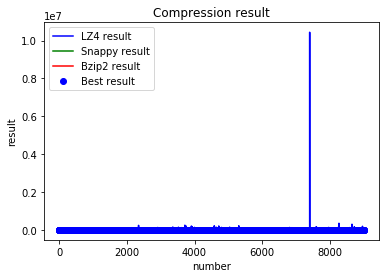

In [19]:
# "bo" это синяя точка
plt.plot(num_col, lz4_col, 'b', label='LZ4 result')
plt.plot(num_col, snappy_col, 'g', label='Snappy result')
plt.plot(num_col, bzip2_col, 'r', label='Bzip2 result')
plt.plot(num_col, result_col, 'bo', label='Best result')

plt.title('Compression result')
plt.xlabel('number')
plt.ylabel('result')
plt.legend()

plt.show()

# [2] Подготовка данных

### Декодирование и перемешивание

In [4]:
import base64
import numpy as np
from random import shuffle

decode_sample_data_col = [base64.decodebytes(bytes(sample, 'utf-8')) for sample in sample_data_col]

int_sample_data_col = list(map(lambda x: [byte for byte in x], [sample for sample in decode_sample_data_col]))
samples = np.array(int_sample_data_col)
results = np.array(result_col)

samples_with_results = list(zip(samples, results))
shuffle(samples_with_results)

samples[:], results[:] = zip(*samples_with_results)

#### Чёрная магия

In [163]:
print(len(samples))
test1 = [b for bb in samples for b in bb]
test2 = list(map(lambda x: [byte for byte in x], [sample for sample in samples]))
test2[0]


1000


[255,
 216,
 255,
 224,
 0,
 16,
 74,
 70,
 73,
 70,
 0,
 1,
 1,
 1,
 0,
 240,
 0,
 240,
 0,
 0,
 255,
 226,
 2,
 64,
 73,
 67,
 67,
 95,
 80,
 82,
 79,
 70,
 73,
 76,
 69,
 0,
 1,
 1,
 0,
 0,
 2,
 48,
 65,
 68,
 66,
 69,
 2,
 16,
 0,
 0,
 109,
 110,
 116,
 114,
 82,
 71,
 66,
 32,
 88,
 89,
 90,
 32,
 7,
 207,
 0,
 6,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 97,
 99,
 115,
 112,
 65,
 80,
 80,
 76,
 0,
 0,
 0,
 0,
 110,
 111,
 110,
 101,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 246,
 214,
 0,
 1,
 0,
 0,
 0,
 0,
 211,
 45,
 65,
 68,
 66,
 69,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 99,
 112,
 114,
 116,
 0,
 0,
 0,
 252,
 0,
 0,
 0,
 50,
 100,
 101,
 115,
 99,
 0,
 0,
 1,
 48,
 0,
 0,
 0,
 107,
 119,
 116,
 112,
 116,
 0,
 0,
 51,
 68,
 69,
 21,
 30,
 237,
 215,
 88,
 45,
 163,
 237,
 169,
 215,
 53,
 148,
 22

In [5]:
samples.shape

(9000, 2000)

### Нормализация результатов

In [6]:
from keras.utils.np_utils import to_categorical

categorical_samples = to_categorical(samples)
categorical_results = to_categorical(results)

Using TensorFlow backend.


### Разделение на 3 части

In [7]:
train_samples = samples[:3000]
validation_samples = samples[3000:6000]
test_samples = samples[6000:]

train_results = categorical_results[:3000]
validation_results = categorical_results[3000:6000]
test_results = categorical_results[6000:]

# [3] Конструирование модели

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(2000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# [4] Обучение модели

In [10]:
history = model.fit(
    train_samples,
    train_results,
    epochs=20,
    batch_size=512,
    validation_data=(
        validation_samples, 
        validation_results
    )
)

Train on 3000 samples, validate on 3000 samples
Epoch 1/20
3000/3000 [==============================] - 5s 2ms/step - loss: 9.0168 - acc: 0.4220 - val_loss: 8.2004 - val_acc: 0.4907
Epoch 2/20
3000/3000 [==============================] - 0s 36us/step - loss: 8.4524 - acc: 0.4757 - val_loss: 8.2003 - val_acc: 0.4907
Epoch 3/20
3000/3000 [==============================] - 0s 37us/step - loss: 8.4516 - acc: 0.4757 - val_loss: 8.2005 - val_acc: 0.4907
Epoch 4/20
3000/3000 [==============================] - 0s 38us/step - loss: 8.4512 - acc: 0.4757 - val_loss: 8.2008 - val_acc: 0.4907
Epoch 5/20
3000/3000 [==============================] - 0s 36us/step - loss: 8.4511 - acc: 0.4753 - val_loss: 8.2009 - val_acc: 0.4907
Epoch 6/20
3000/3000 [==============================] - 0s 37us/step - loss: 8.4510 - acc: 0.4757 - val_loss: 8.0731 - val_acc: 0.4960
Epoch 7/20
3000/3000 [==============================] - 0s 37us/step - loss: 8.3972 - acc: 0.4787 - val_loss: 8.1904 - val_acc: 0.4913
Epoch 8/

# [5] Вывод результатов

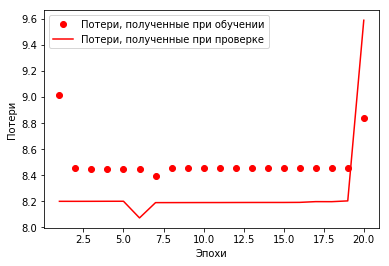

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Потери, полученные при обучении')
plt.plot(epochs, val_loss, 'r', label='Потери, полученные при проверке')
#plt.title('Потери, полученные при обучении и проверке')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()

plt.show()

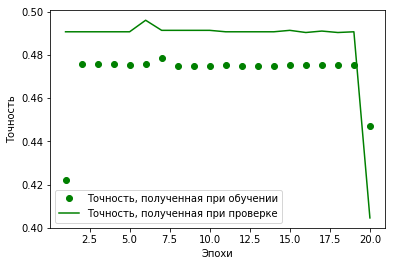

In [12]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'go', label='Точность, полученная при обучении')
plt.plot(epochs, val_acc, 'g', label='Точность, полученная при проверке')
#plt.title('Точность, полученная при обучении и проверке')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

plt.show()

# [6] Переобуение

In [13]:
model.fit(
    train_samples,
    train_results,
    epochs=3,
    batch_size=512,
    validation_data=(
        validation_samples, 
        validation_results
    )
)

results = model.evaluate(test_samples, test_results)

Train on 3000 samples, validate on 3000 samples
Epoch 1/3
3000/3000 [==============================] - 0s 37us/step - loss: 8.8145 - acc: 0.4530 - val_loss: 9.5901 - val_acc: 0.4040
Epoch 2/3
3000/3000 [==============================] - 0s 36us/step - loss: 8.8144 - acc: 0.4530 - val_loss: 9.5902 - val_acc: 0.4047
Epoch 3/3
3000/3000 [==============================] - 0s 68us/step


In [14]:
results

[10.161236996968587, 0.3683333334128062]

# [7] Получение предсказаний для новых данных

In [15]:
predictions = model.predict(test_samples)

In [16]:
np.set_printoptions(threshold=np.nan)
predictions

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 6.68089900e-25, 2.71906391e-12, 5.24796949e-14],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.25351015e-31, 4.35784763e-13, 1.21285726e-13],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e

In [18]:
np.argmax(predictions[0])

3